<img src="https://pbs.twimg.com/profile_images/1092394418135539713/eplLRcDN_400x400.jpg" width=80px style="align:left"> </img>

# The Internet of Production Alliance

## Data report for the [Data awards Round 1](https://www.internetofproduction.org/events/launch-of-the-okw-data-awards)

Autor: Antonio de Jesus Anaya Hernandez, DevOps eng. for the IoPA.

Autor: The internet of Production Alliance, 2023.

Data was collected by "Glyxon labs', as part of the OKW Data Awards program.

The Open Know Where (OKW) Standard is part of the Internet of Production Alliance and its members.

License: CC BY SA

![CC BY SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)

# Introduction

This review is provided as an analysis and recomendations document for the awardees participants of the OKW Data Awards.


In [1]:
import geopandas
import folium
from folium.plugins import HeatMap, MiniMap, FloatImage, Search, LocateControl
import pandas as pd
import os
from datetime import datetime
from scipy.spatial import KDTree
#import base64
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
location = "../data/"
dir = os.path.dirname(os.path.abspath(''))
filename = os.path.join(dir, location)

# In[2]:

files = ["threed.geojson", "cnc.geojson", "laser.geojson", "prototipado.geojson", "robotica.geojson"]
files = [location + 'geojson/' + file for file in files]

for filename in files:
    print('Filename: \t', str(filename.split(sep='/')[3]))
    print('Format: \t', str(filename.split(sep='/')[3].split(sep='.')[1]).upper())
    print('Modified: \t', str(datetime.fromtimestamp(os.path.getctime(filename)).strftime('%Y-%m-%d %H:%M:%S')))
    print('Size: \t\t', str(os.path.getsize(filename)), ' KB')


os.environ['PROJ_LIB'] = r'C:\Users\ANAYA\anaconda3\envs\okw_data_awards\Library\share\proj'


merged_data = []
for filename in files:
    print(filename)
    data = geopandas.read_file(filename)
    print('('*40)
    print(str(filename).split('.')[0])
    data['capability'] = str(filename.split(sep='/')[3].split(sep='.')[0])
    data = data.drop(columns=['description', 'styleUrl', 'icon-opacity', 'icon-color', 'icon-scale', 'icon'])
    data = data.loc[data.drop_duplicates(subset=['geometry']).index]
    data.crs = "EPSG:4326"
    merged_data.append(data)
    print(data.shape)

Filename: 	 threed.geojson
Format: 	 GEOJSON
Modified: 	 2023-03-10 13:43:04
Size: 		 609052  KB
Filename: 	 cnc.geojson
Format: 	 GEOJSON
Modified: 	 2023-03-10 13:43:04
Size: 		 391684  KB
Filename: 	 laser.geojson
Format: 	 GEOJSON
Modified: 	 2023-03-10 13:43:04
Size: 		 303769  KB
Filename: 	 prototipado.geojson
Format: 	 GEOJSON
Modified: 	 2023-03-10 13:43:04
Size: 		 46871  KB
Filename: 	 robotica.geojson
Format: 	 GEOJSON
Modified: 	 2023-03-10 13:43:04
Size: 		 200385  KB
../data/geojson/threed.geojson
((((((((((((((((((((((((((((((((((((((((

(1178, 3)
../data/geojson/cnc.geojson
((((((((((((((((((((((((((((((((((((((((

(865, 3)
../data/geojson/laser.geojson
((((((((((((((((((((((((((((((((((((((((

(596, 3)
../data/geojson/prototipado.geojson
((((((((((((((((((((((((((((((((((((((((

(105, 3)
../data/geojson/robotica.geojson
((((((((((((((((((((((((((((((((((((((((

(469, 3)


In [3]:
# files = ["3d_printing.geojson", "cnc.geojson", "laser_cutting.geojson","prototyping.geojson","robotics.geojson"]

In [4]:
# for filename in files:
#     print('Filename: \t', str(filename))
#     print('Format: \t', str(filename.split(sep='.')[1]).upper())
#     print('Modified: \t', str(datetime.fromtimestamp(os.path.getctime(filename)).strftime('%Y-%m-%d %H:%M:%S')))
#     print('Size: \t\t', str(os.path.getsize(filename)), ' KB')

In [5]:
# os.environ['PROJ_LIB'] = r'C:\Users\ANAYA\anaconda3\envs\okw_data_awards\Library\share\proj'

In [6]:
# merged_data = []
# for filename in files:
#    data = geopandas.read_file(filename)
#    data['type'] = str(filename).split('.')[0]
#    data = data.drop(columns=['description', 'styleUrl','icon-opacity', 'icon-color', 'icon-scale', 'icon'])
#    data = data.loc[data.drop_duplicates(subset=['geometry']).index]

#    merged_data.append(data)
#    print(data.shape)

In [7]:
print(sum([x.shape[0] for x in merged_data]))

3213


# 1

## Inspecting data

In [8]:
merged_data[0]

,name,geometry,capability
0,Impresión 3D Infinity Makers (ELF Maker),POINT Z (-99.24064 19.01404 0.00000),threed
1,Impresión 3D y Electrónica. DIAC-3D,POINT Z (-99.24327 18.92853 0.00000),threed
2,IMPRESIÓN 3D Taller de diseño,POINT Z (-99.20824 18.92575 0.00000),threed
3,Jart Studio (sucursal) - Impresión 3D,POINT Z (-99.14459 18.87846 0.00000),threed
4,3DZone S.A. de C.V.,POINT Z (-99.19289 18.93332 0.00000),threed
...,...,...,...
1633,Usina Fab Lab,POINT Z (-51.20268 -30.03210 0.00000),threed
1634,Adoro Robótica Makerspace,POINT Z (-43.18070 -22.94186 0.00000),threed
1635,MXPCB,POINT Z (-89.64009 21.04402 0.00000),threed
1636,FabLab Cuiabá-BR,POINT Z (-47.43440 -23.47281 0.00000),threed


## Reverse geocoding 

In [10]:
geocodes = pd.read_csv(location + 'csv/' + 'rg_cities1000.csv')

# Create a KDTree from the lat-lon coordinates in the geocodes DataFrame
tree = KDTree(geocodes[['lat', 'lon']])

In [11]:
def get_country_code(latlong):
    lat, lon = latlong
    _, idx = tree.query([lat, lon])
    return geocodes.iloc[idx]['cc']

def get_city(latlong):
    lat, lon = latlong
    _, idx = tree.query([lat, lon])
    return geocodes.iloc[idx]['name']

In [12]:
for data in merged_data:
    data['country'] = list(map(get_country_code, data['geometry'].apply(lambda geom: (geom.y, geom.x))))

In [13]:
for data in merged_data:
    data['city'] = list(map(get_city, data['geometry'].apply(lambda geom: (geom.y, geom.x))))

In [14]:
for data in merged_data:
    data.drop(columns='geometry').groupby('country').size().sort_values(ascending=False)

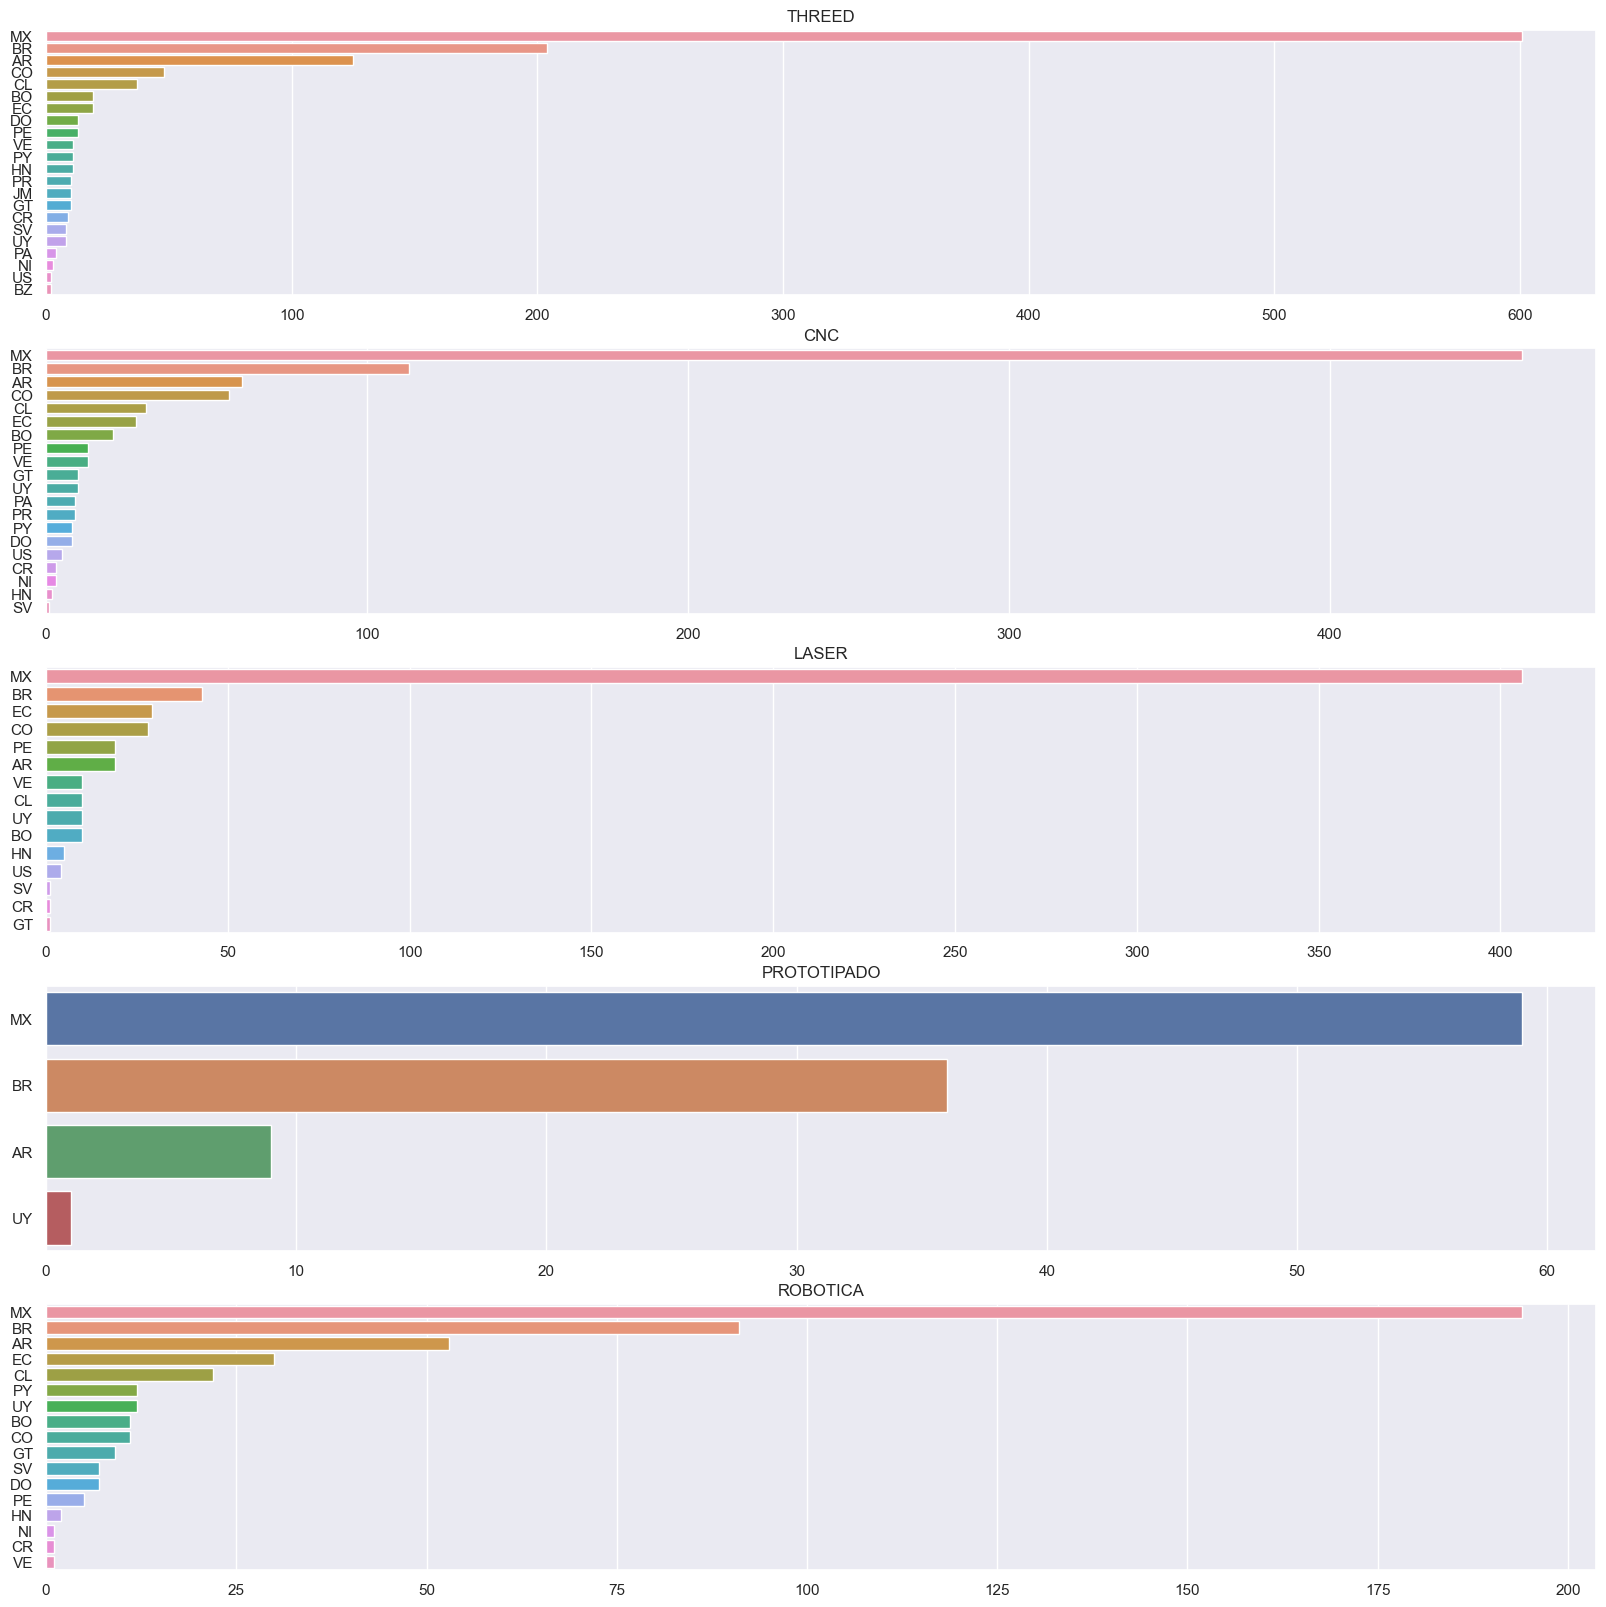

In [16]:
sns.set()
fig, axes = plt.subplots(5, figsize=(20,20))
for index, data in enumerate(merged_data):
    ax = sns.countplot(y='country', data=data.drop(columns='geometry'), order=data['country'].value_counts().index, ax=axes[index])
    ax.set_title(data['capability'][0].upper())
    #ax.axis('off')
    ax_x = ax.axes.get_xaxis()
    # ax_x.set_visible(False)
    x_label = ax_x.get_label()
    x_label.set_visible(False)
    ax_y = ax.axes.get_yaxis()
    y_label = ax_y.get_label()
    y_label.set_visible(False)

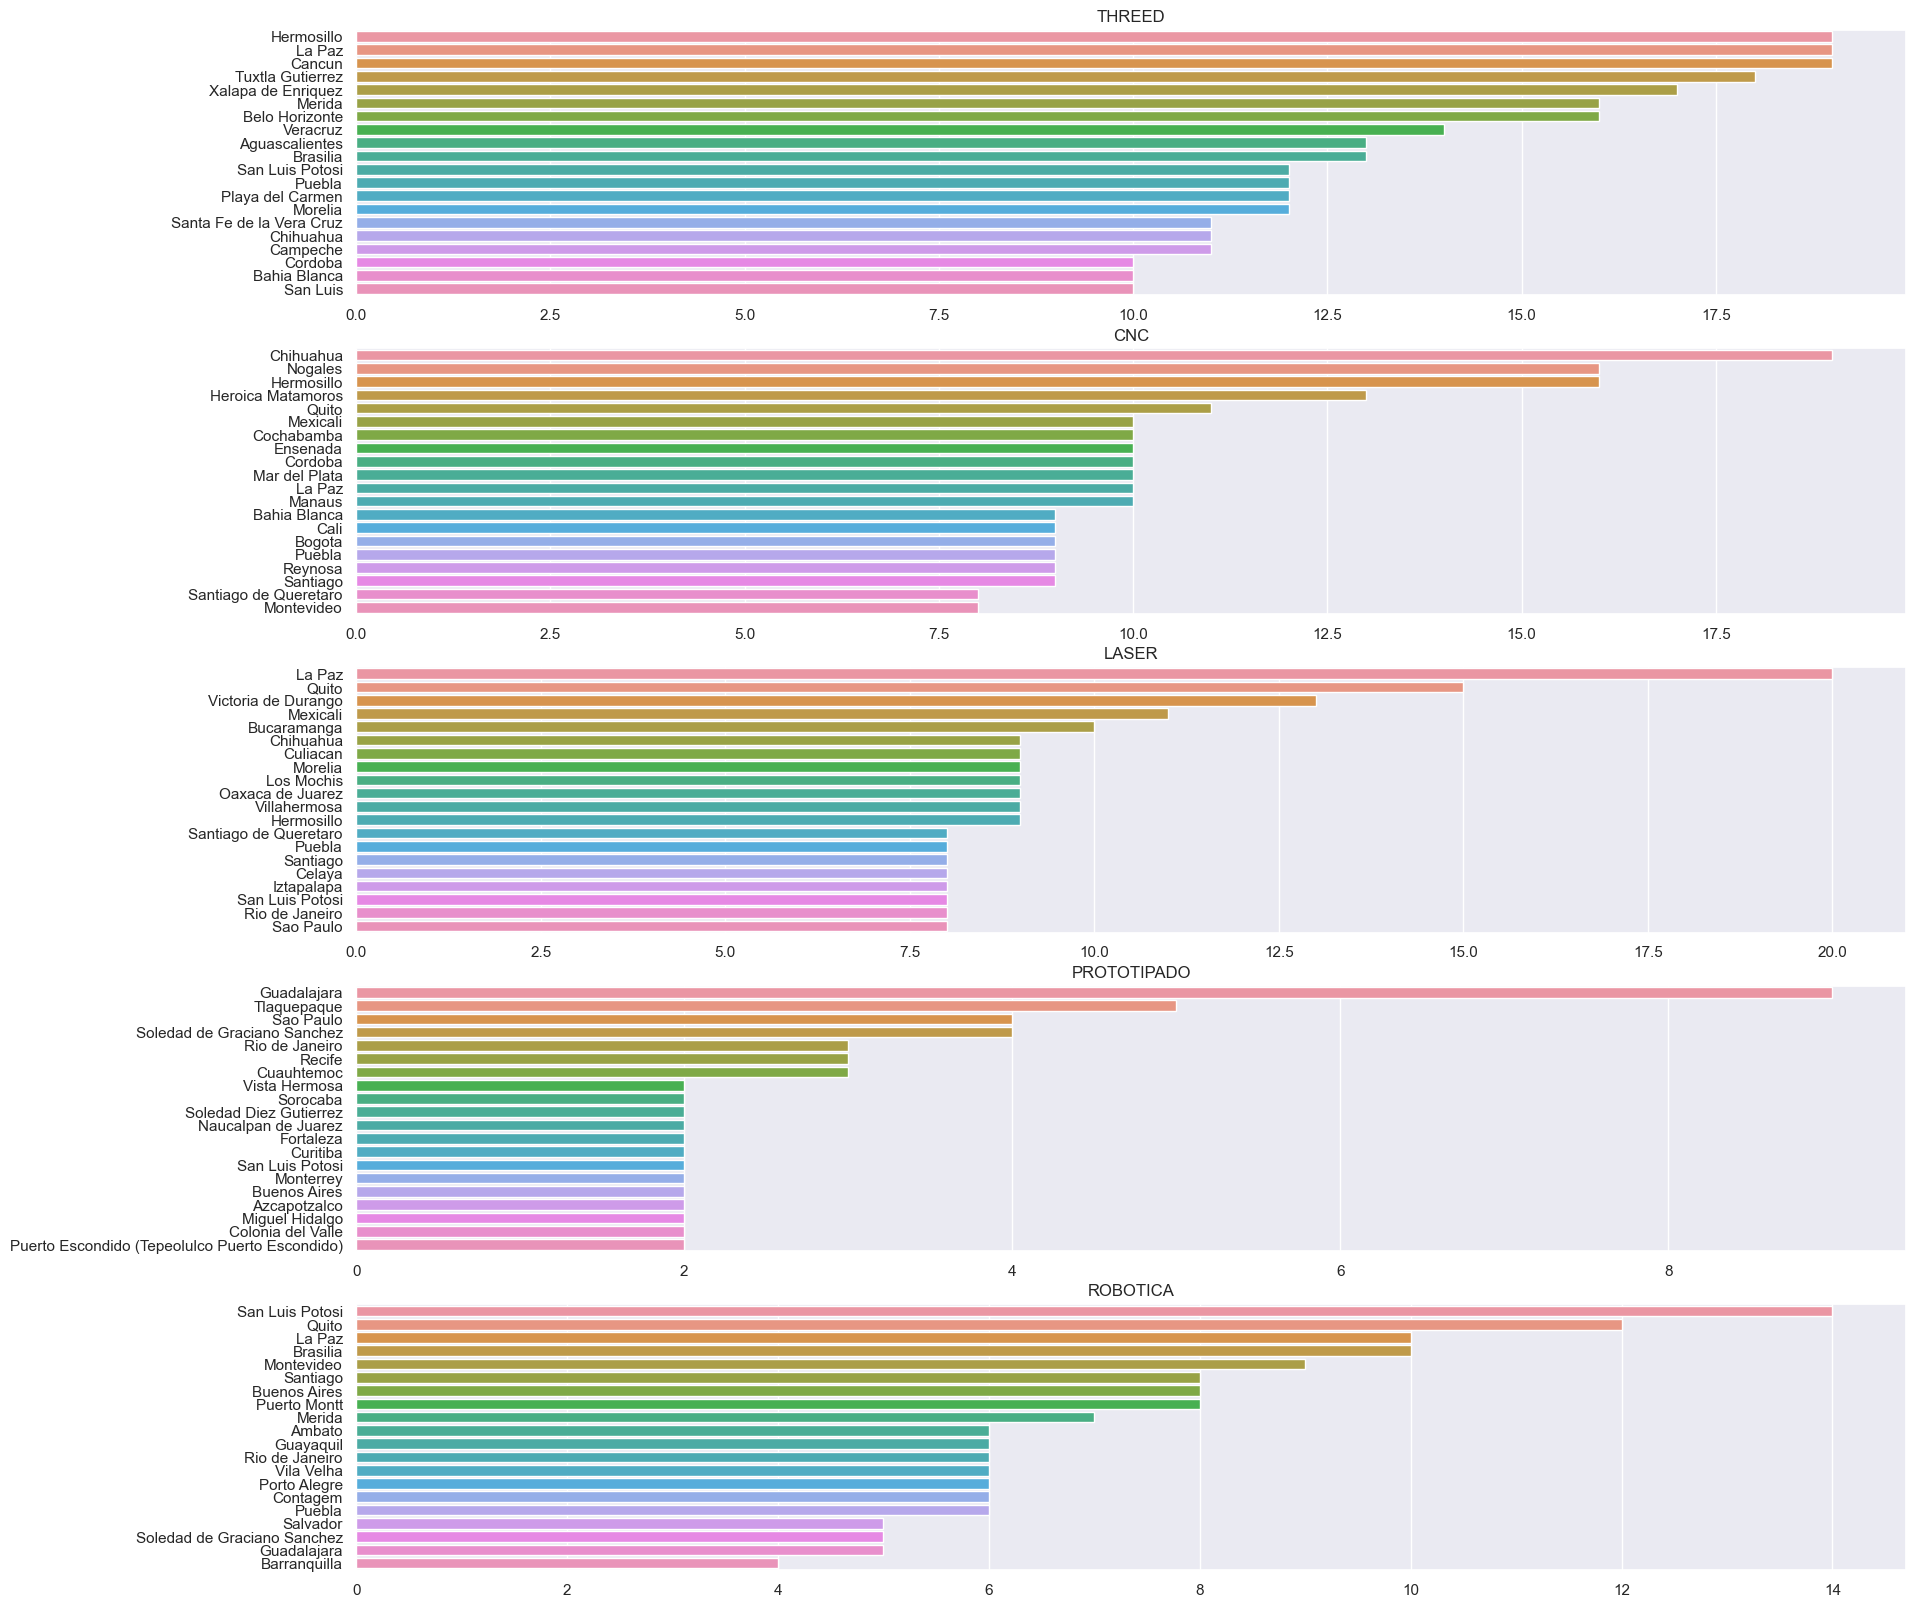

In [17]:
sns.set()
fig, axes = plt.subplots(5, figsize=(20,20))

for index, data in enumerate(merged_data):
    data.drop(columns='geometry').groupby('city').size().sort_values(ascending=False)
    top_cities = data['city'].value_counts().nlargest(20).index
    ax = sns.countplot(y='city', data=data[data['city'].isin(top_cities)].drop(columns='geometry'), order=top_cities, ax=axes[index])
    ax.set_title(data['capability'][0].upper())
    #ax.axis('off')
    ax_x = ax.axes.get_xaxis()
    # ax_x.set_visible(False)
    x_label = ax_x.get_label()
    x_label.set_visible(False)
    ax_y = ax.axes.get_yaxis()
    y_label = ax_y.get_label()
    y_label.set_visible(False)

In [18]:
point_max = max([(data.geometry.y.max(),  data.geometry.x.max()) for data in merged_data])
point_min = min([(data.geometry.y.min(),  data.geometry.x.min()) for data in merged_data])

main_map = folium.Map(tiles=None, prefer_canvas=False)
# folium.raster_layers.TileLayer(tiles='openstreetmap', name='Basic').add_to(main_map)
main_map.fit_bounds((point_min, point_max))

In [19]:
#colors = ['#E58606','#2F8AC4','#52BCA3','#99C945','#CC61B0','#24796C','#DAA51B','#5D69B1','#764E9F','#ED645A','#CC3A8E','#A5AA99']
colors = ['#7F3C8D','#11A579','#3969AC','#F2B701','#E73F74','#80BA5A','#E68310','#008695','#CF1C90','#f97b72','#4b4b8f','#A5AA99']
layers = []

marker_layer = folium.FeatureGroup(name='Location markers',show=False)
main_map.add_child(marker_layer)

for index, data in enumerate(merged_data):
    
    layers.append(folium.plugins.FeatureGroupSubGroup(marker_layer, data['capability'][0].title()))
    
    popup = folium.features.GeoJsonPopup(fields=['name', 'capability'],
                                         aliases=['Name:', 'Capability:'],
                                         localize=True,
                                         sticky=False,
                                         labels=False,
                                         style="font-size: 12px;",
                                        )
    geojson = folium.GeoJson(data=data,
                             popup=popup,
                             marker=folium.Circle(radius=4, 
                                                  fill_color=colors[index], 
                                                  opacity=0.4, 
                                                  color=colors[index], 
                                                  weight=10),
                            )
    geojson.add_to(layers[index])
    main_map.add_child(layers[index])

In [20]:
colors_dict = {
    0.1: '#f3e79b',
    0.2: '#fac484',
    0.3: '#f8a07e',
    0.4: '#eb7f86',
    0.5: '#ce6693',
    0.6: '#a059a0',
    0.7: '#5c53a5',
    0.8: '#d1eeea',
    0.9: '#a8dbd9',
    1.0: '#85c4c9'
}

heatmap_layer = folium.FeatureGroup(name='Capabilities heatmap',show=True)

for index, data in enumerate(merged_data):
    
    heatmap_data = [[row['geometry'].y, row['geometry'].x] for index, row in data.iterrows()]
    heatmap = HeatMap(heatmap_data, 
                      # gradient=colors_dict, 
                      opacity=0.1, 
                      radius=10,
                      blur=12)
    
    print(data['capability'][0])

    heatmap.add_to(heatmap_layer)
main_map.add_child(heatmap_layer)

threed
cnc
laser
prototipado
robotica


In [22]:
chorophlet_geo = geopandas.read_file(location + 'json/' + 'region_america.json', encoding='utf-8')
chorophlet_geo = chorophlet_geo[['iso_a2','geometry']]
chorophlet_geo = chorophlet_geo.rename(columns = {"iso_a2":"country"})

In [23]:
data_a = merged_data[0]
for index, data in enumerate(merged_data, 1):
    data_a = pd.concat([data_a, data])

data_a = data_a.drop_duplicates(subset=['name'])
data_b = data_a.drop(columns='geometry').groupby('country').size().reset_index(name='count')
data_c = data_a.drop(columns='geometry').groupby('city').size().reset_index(name='count')
print(data_a.shape, data_b.shape, data_c.shape)


(2885, 5) (22, 2) (730, 2)


In [24]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#B7D696',  
                                'color':'#000000', 
                                'fillOpacity': 0.1, 
                                'weight': 0.1}


choropleth_pop = folium.features.GeoJson(data = chorophlet_geo.merge(data_b, on='country'),
                              style_function=style_function, 
                              control=True,
                              name='Total locations by country',
                              highlight_function=highlight_function,
                              tooltip=folium.features.GeoJsonTooltip(
                                  fields=['country','count'],
                                  aliases=['Country: ','Locations: '],
                                  style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
                              ))
main_map.add_child(choropleth_pop)
main_map.keep_in_front(choropleth_pop)


In [25]:
location_search = Search(
    layer=marker_layer,
    geom_type="Point",
    placeholder="Search by location name",
    collapsed=True,
    search_label="name",
).add_to(main_map)

In [26]:
logo_url = 'https://github.com/kny5/data_reports/raw/main/assets/img/iopa_logo_okw.png'
logo_size = (10, 10)
icon = folium.features.CustomIcon(logo_url, icon_size=logo_size)
span = 1
float_image = FloatImage(logo_url, bottom=span, left=span, width=logo_size[0], height=logo_size[1])
main_map.add_child(float_image)

minimap = MiniMap()
main_map.add_child(minimap)

loc_ctrl = LocateControl()
main_map.add_child(loc_ctrl)

map_control = folium.LayerControl(collapsed=True)
folium.TileLayer('cartodbpositron', name='Gray', control=False, attr=None).add_to(main_map)
main_map.add_child(map_control)

In [27]:
main_map.save("data_awards_r1.html")

## Interacitive map

    1. Usage: Click on top-right corner click selector to switch on/off the interactive Markers.

In [28]:
data_a.to_csv('r1.csv')